<a href="https://colab.research.google.com/github/shukhy/Python-Machine-Learning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab.files import upload
file = upload()

Saving DecisionTree.csv to DecisionTree.csv


In [10]:
data = pd.read_csv("DecisionTree.csv")
data=data.drop('Days',axis=1)
data

,Outlook,Temprature,Routine,Wear Jacket
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [9]:
data.isnull().sum()

Outlook        0
Temprature     0
Routine        0
Wear Jacket    0
dtype: int64

In [11]:
y=data['Wear Jacket']
y

0     No
1    Yes
2     No
3    Yes
4    Yes
5     No
6     No
7     No
Name: Wear Jacket, dtype: object

In [14]:
x = data.drop('Wear Jacket',axis=1)
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [12]:
from sklearn.preprocessing import LabelEncoder


In [16]:
le = LabelEncoder()
x.Outlook = le.fit_transform(data['Outlook'])
x.Temprature = le.fit_transform(data['Temprature'])
x.Routine = le.fit_transform(data['Routine'])
x


,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


In [17]:
from sklearn.tree import DecisionTreeClassifier


In [18]:
dtc = DecisionTreeClassifier()

In [19]:
dtc.fit(x,y)

DecisionTreeClassifier()

In [20]:
dtc.predict([[1,1,0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

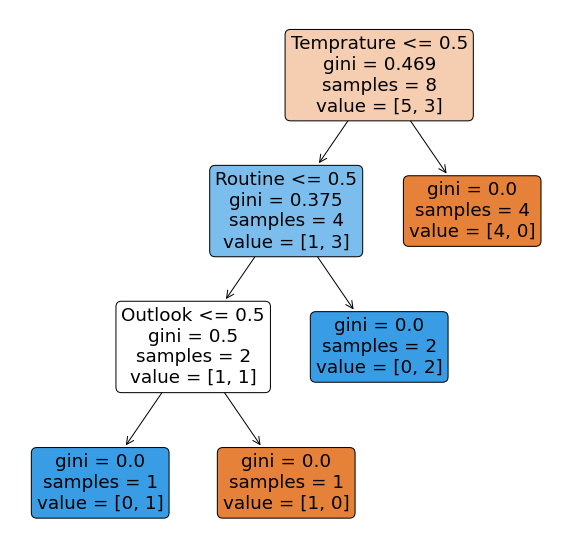

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(dtc,filled=True,rounded=True,feature_names=data.columns)